<a href="https://colab.research.google.com/github/VritangiKansal/FCC-Database-Analysis/blob/main/fcc_bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [5]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
dataset_cols

['bike_count',
 'hour',
 'temp',
 'humidity',
 'wind',
 'visibility',
 'dew_pt_temp',
 'radiation',
 'rain',
 'snow',
 'functional']

In [6]:
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape').drop(['Date', 'Holiday', 'Seasons'], axis=1)

In [7]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [8]:
df.columns = dataset_cols

In [9]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [10]:
df["functional"] = (df["functional"] == "yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [11]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,0
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,0
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,0
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,0
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,0


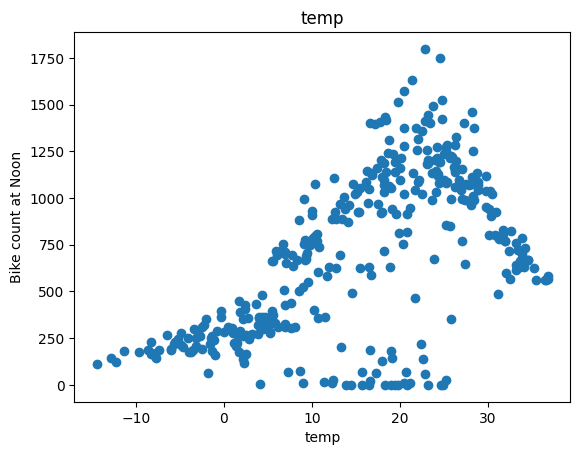

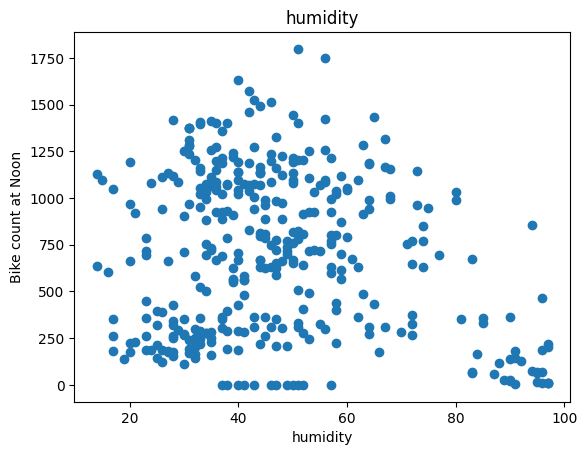

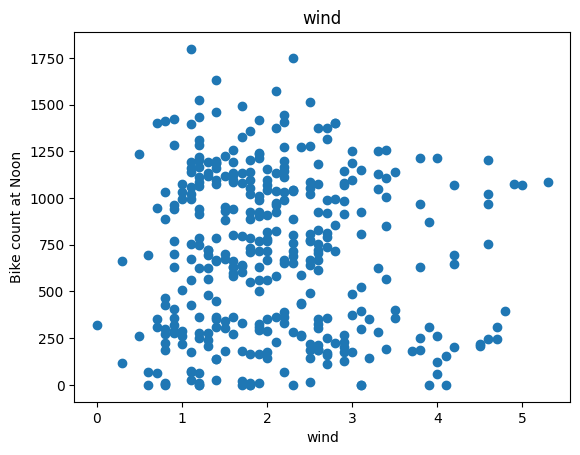

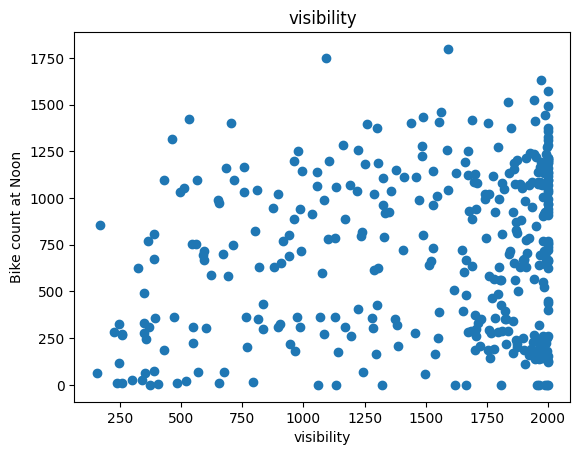

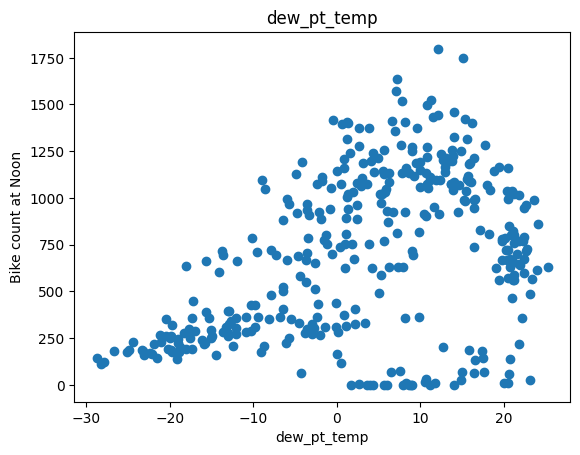

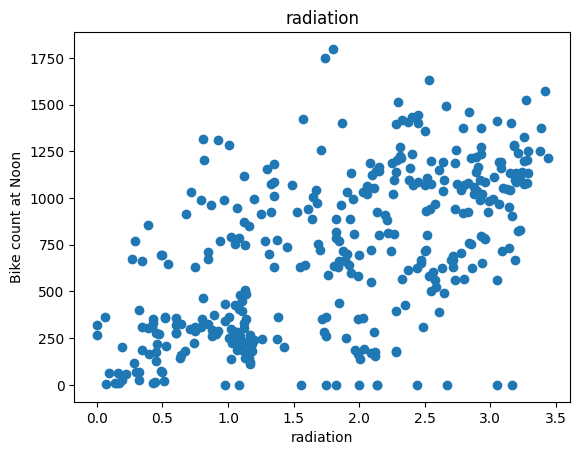

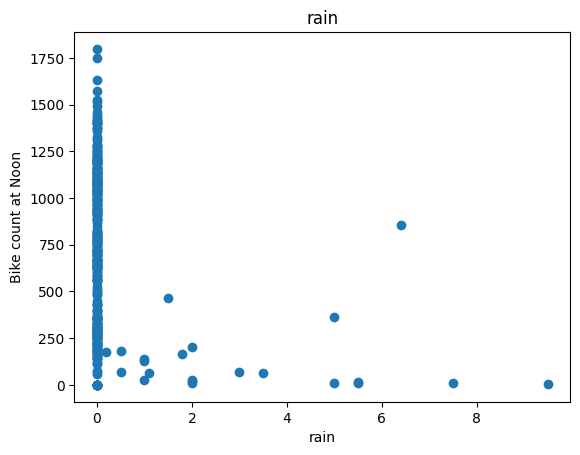

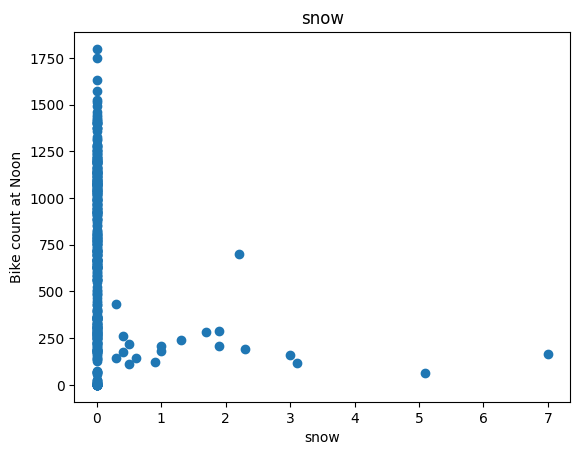

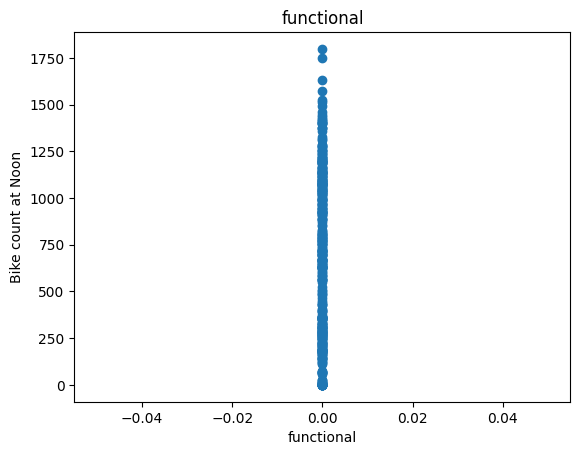

In [12]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at Noon")
  plt.xlabel(label)
  plt.show()


In [13]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [14]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train/Valid/Test dataset

In [15]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [34]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y


In [37]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [38]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [24]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.77679971]] [388.67168494]


In [25]:
temp_reg.score(X_test_temp, y_test_temp) # some association

0.27975276085473355

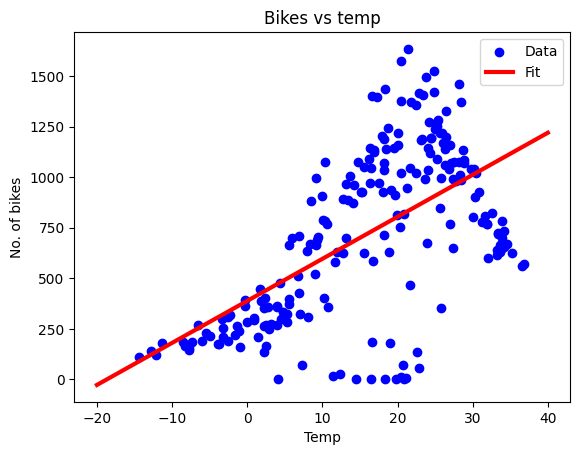

In [39]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color = 'blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("No. of bikes")
plt.xlabel("Temp")
plt.show()

#Multiple Linear Regression

In [30]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [40]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [42]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [44]:
all_reg.score(X_test_all, y_test_all)

0.47470980822253217

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_lr

# Regression with Neural Net

In [47]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [48]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [50]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss ="mean_squared_error")

In [55]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data= (X_val_temp, y_val_temp)
)

In [56]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

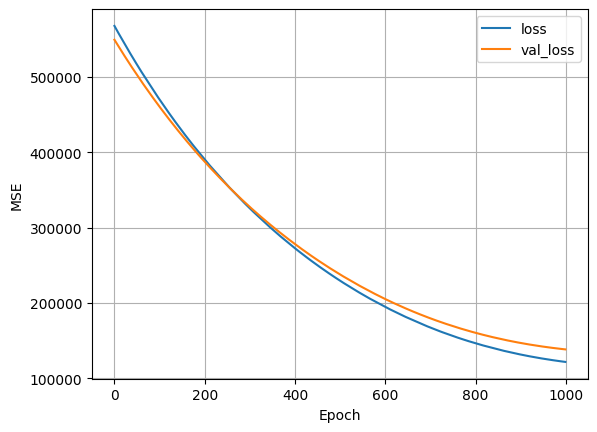

In [57]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


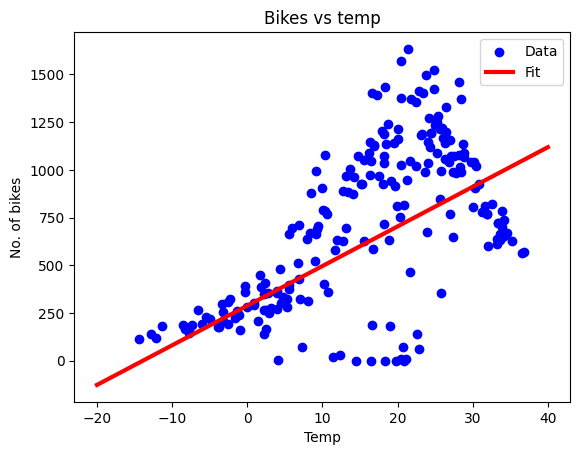

In [58]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color = 'blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("No. of bikes")
plt.xlabel("Temp")
plt.show()

#Neural Net

In [69]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss ="mean_squared_error")

In [70]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data = (X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

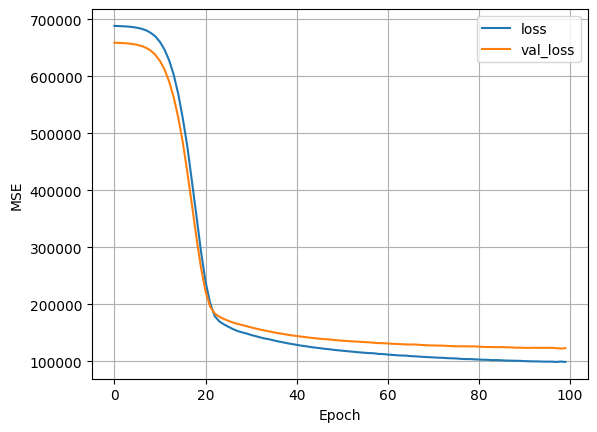

In [71]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


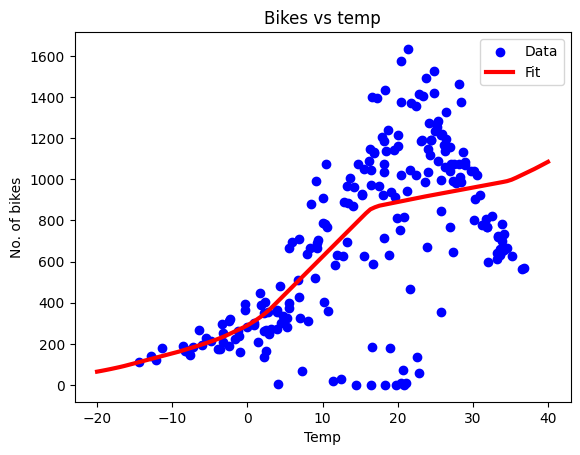

In [72]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color = 'blue')
x= tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("No. of bikes")
plt.xlabel("Temp")
plt.show()

In [73]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=None)
all_normalizer.adapt(X_train_all)

nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss ="mean_squared_error")

In [74]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data = (X_val_all, y_val_all),
    verbose=0, epochs=100
)

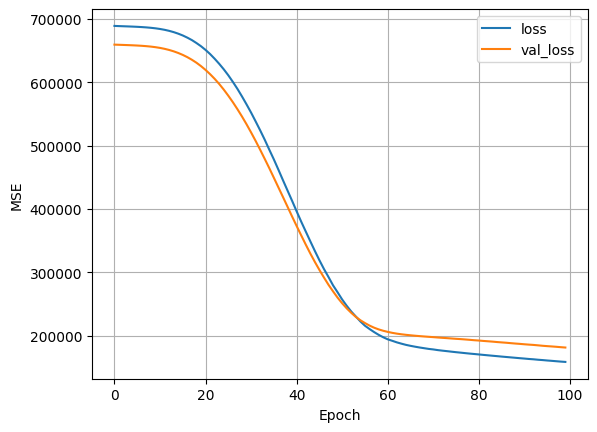

In [75]:
plot_loss(history)

In [79]:
# Calculate the MSE for both Linear reg and NN
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 5ms/step


In [80]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [81]:
MSE(y_pred_lr, y_test_all)

111657.6654471528

In [82]:
MSE(y_pred_nn, y_test_all)

213146.22384838795

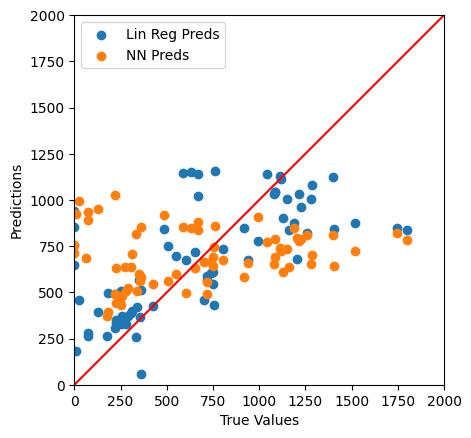

In [89]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label = "Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label = "NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_=plt.plot(lims, lims, c="red")